In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import signal
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
from time import sleep

# Test recording / playing sounds

In [4]:
duration = 12
fs = 44100
myrecording = sd.rec(duration * fs, samplerate=fs, channels=1)
print("Done!")

Done!


In [5]:
sd.play(myrecording, fs)

<class 'numpy.ndarray'>
529200
[[ -1.22070312e-04]
 [ -1.52587891e-04]
 [ -6.40869141e-04]
 ..., 
 [  9.15527344e-05]
 [  2.13623047e-04]
 [  1.22070312e-04]]


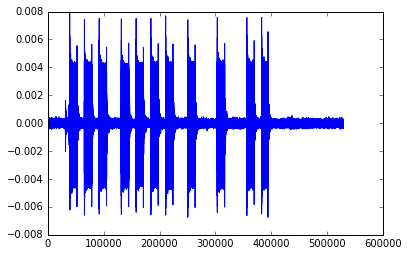

In [6]:
print(type(myrecording))
print(len(myrecording))
print(myrecording)
plt.plot(myrecording)
plt.show()

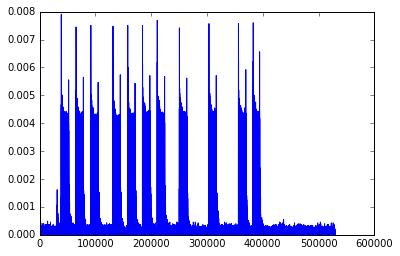

In [7]:
for i in range(myrecording.size):
    if myrecording[i] < 0:
        myrecording[i] = 0
plt.plot(myrecording)
plt.show()

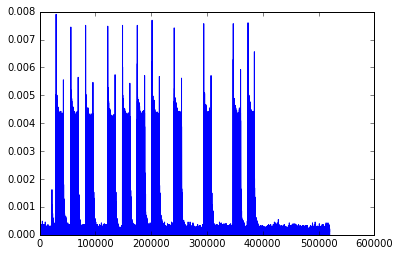

In [46]:
def find_start(array):
    avg = []
    for i in range(array.size - 14700):
        avg.append(np.mean(array[i:i+14700]))

    try:
        return array[np.argmax(avg) % 14700:]
    except:
        print("no max")
        return array


test = find_start(myrecording)
plt.plot(test)

519850


0.00035786323

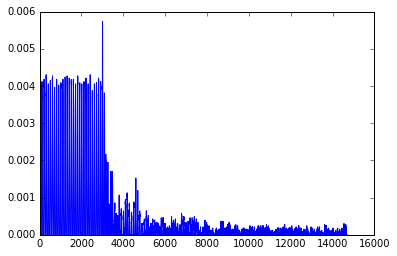

In [60]:
print(test.size)
i=9
plt.plot(test[i*14700:(i+1)*14700])
np.mean(test[i*14700:(i+1)*14700])

<Container object of 35 artists>

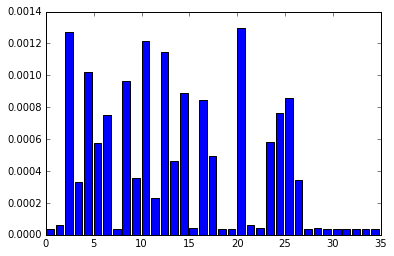

In [61]:
avg = []
for i in range(int(test.size/14700)):
    avg.append(np.mean(test[i*14700:(i+1)*14700]))
plt.bar(range(len(avg)),avg)
# [1,1,0,1,1,1,1,0,1,0,0,1,0,0,1]

# Test generating sounds

In [2]:
def zero_or_one(tone_array, i, one_tone, zero_tone):
    
    if i == 0:
        tone_array = np.concatenate((tone_array, zero_tone))
        tone_array = np.concatenate((tone_array, zero_tone))
        print("zero")
    else:
        tone_array = np.concatenate((tone_array, zero_tone))
        tone_array = np.concatenate((tone_array, one_tone))
        print("one")
        
    return tone_array

In [3]:
sd.default.samplerate = 44100

time = .3
frequency = 440

# Generate time of samples between 0 and time seconds
samples = np.arange(44100 * time) / 44100.0
# Recall that a sinusoidal wave of frequency f has formula w(t) = A*sin(2*pi*f*t)

one_tone = 10000 * np.sin(2 * np.pi * frequency * samples)
zero_tone = samples * 0

# Convert it to wav format (16 bits)


In [4]:
#start with one
tone_array = one_tone

for i in [1,1,0,1,1,1,1,0,1,0,0,1,0,0,1]:
    tone_array = zero_or_one(tone_array, i, one_tone, zero_tone)

#end with one
tone_array = zero_or_one(tone_array, 1, one_tone, zero_tone)

tone_array = np.array(tone_array, dtype=np.int16)

one
one
zero
one
one
one
one
zero
one
zero
zero
one
zero
zero
one
one


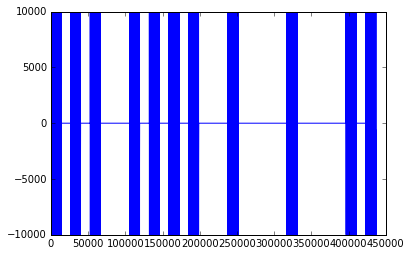

In [15]:
sd.play(tone_array, blocking=True)
plt.plot(tone_array)

3819.4160544217689

In [ ]:
np.mean(myrecording)